# Cohen's algebraic Maass form

In "$q$-identities for Maass wave forms", H. Cohen defined an algebraic Maass wave form (i.e. Maass wave form of eigenvalue $\lambda = 1/4$) arises form one of the Ramanujan's $q$-series.
They are
$$
\begin{align*}
\sigma(q) &= \sum_{n \ge 0} \frac{q^{n(n+1)/2}}{(-q;q)_n} = 1 + \sum_{n \ge 0} (-1)^n q^{n+1}(q;q)_n \\
\sigma^\ast(q) &= 2\sum_{n \ge 0} \frac{(-1)^{n} q^{n^2}}{(q;q^2)_n} = -2 \sum_{n \ge 0} q^{n+1}(q^2;q^2)_n
\end{align*}
$$
Those two are related as $\sigma(q) = - \sigma^\ast(q^{-1})$ when $q$ is a root of unity.
Now if we define $\{T_C(n)\}_{n \in 24 \mathbb{Z} + 1}$ by
$$
q \sigma(q^{24}) = \sum_{n \ge 0} T(n)q^n, \qquad q^{-1} \sigma^\ast(q^{24}) = \sum_{n <0} T(n)q^{|n|},
$$
then $T(n)$ counts the number of elements in $\mathbb{Z}[\sqrt{6}]$ satisfying certain congruence conditions, and the function
$$
u(z) := \sqrt{y} \sum_{n \equiv 1 \,(\mathrm{mod}\,24)} T(n) K_0 \left(\frac{2 \pi |n|y}{24}\right) e^{2 \pi i n x / 24}, \quad z = x + iy \in \mathbb{H}
$$
becomes a Maass wave form of level $\Gamma_0(2)$ and eigenvalue $1/4$ (i.e. algebraic), with suitable multiplier system.

Using the above expressions of $\sigma(q)$ and $\sigma^\ast(q)$, Zagier defined a function $f: \mathbb{Q} \to \mathbb{C}$ as
$$
f(x) = q^{1/24} \sigma(q) = q^{-1/24} \sigma^\ast(q), \quad q = e^{2 \pi i x}, x \in \mathbb{Q}
$$
and proved that $f$ becomes a quantum modular form of weight 1 and level $\Gamma_0(2)$ (with same multiplier system) as $u$; the error functions
$$
\begin{align*}
f(x) - \zeta_{24}^{-1} f(x + 1) &= 0 \\
f(x) - \zeta_{24}^{-1} \frac{1}{|2x + 1|} f\left(\frac{x}{2x + 1}\right) &= h(x)
\end{align*}
$$
are smooth and real-analytic except at $x = -1/2$. The error function $h(x)$ is essentially the "period function" of $u(z)$.

In [1]:
from quantum_modform import *

UCF = UniversalCyclotomicField()
E = UCF.gen

In [2]:
def sigma(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    for n in range(0, a + 1):
        r += (-1)**n * q**(n + 1) * poch(q, q, n)
    return r

def sigma_ast(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    for n in range(0, a + 1):
        r += q**(n + 1) * poch(q**2, q**2, n)
    return r * (-2)

def f(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    return E(24 * a, b) * sigma(x)

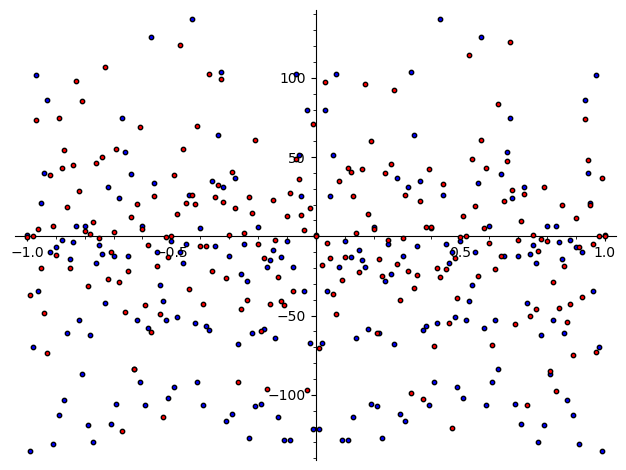

In [3]:
plot_func(f, 100, "both")

In [4]:
# Error functions
def f_T(x):
    # This is identically zero
    return f(x) - E(24, -1) * f(x + 1)

def f_S(x):
    # g(x)
    return f(x) - E(24, -1) * abs(2 * x + 1)^(-1) * f(x / (2 * x + 1))

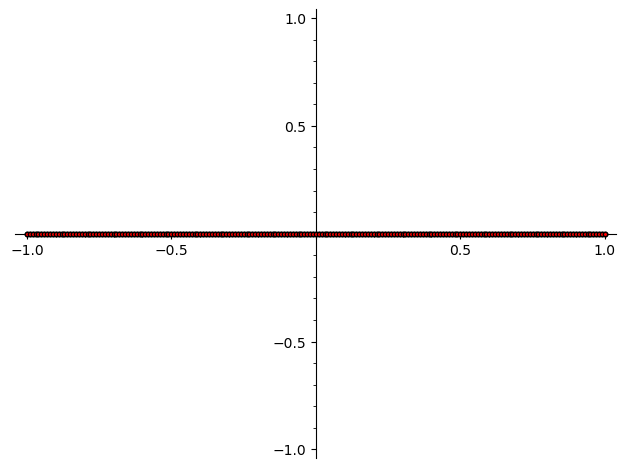

In [5]:
plot_func(f_T, 100, "both")

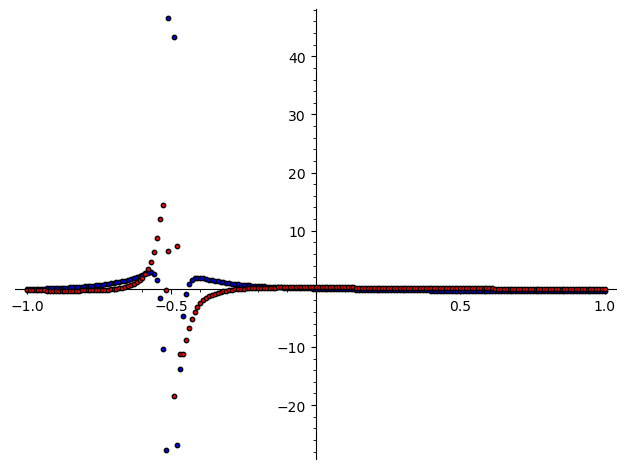

In [6]:
plot_func(f_S, 100, "both", [-1/2])